In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.cm as cm

In [2]:
# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv')
df['Publisher'] = df['Publisher'].fillna('unknown')
df=df.fillna(0)
df.drop(df.loc[df['Global_Sales']==0].index, inplace=True)
df.drop(df.loc[df['metaNote']==0].index, inplace=True)
df.drop(df.loc[df['samename']==0].index, inplace=True)

In [3]:
# Duplication de df dans df_visu pour les visualisations
df_visu = df

In [5]:
df_visu['Global_Sales'].mean()

0.6566640540805547

# **La classe américaine**

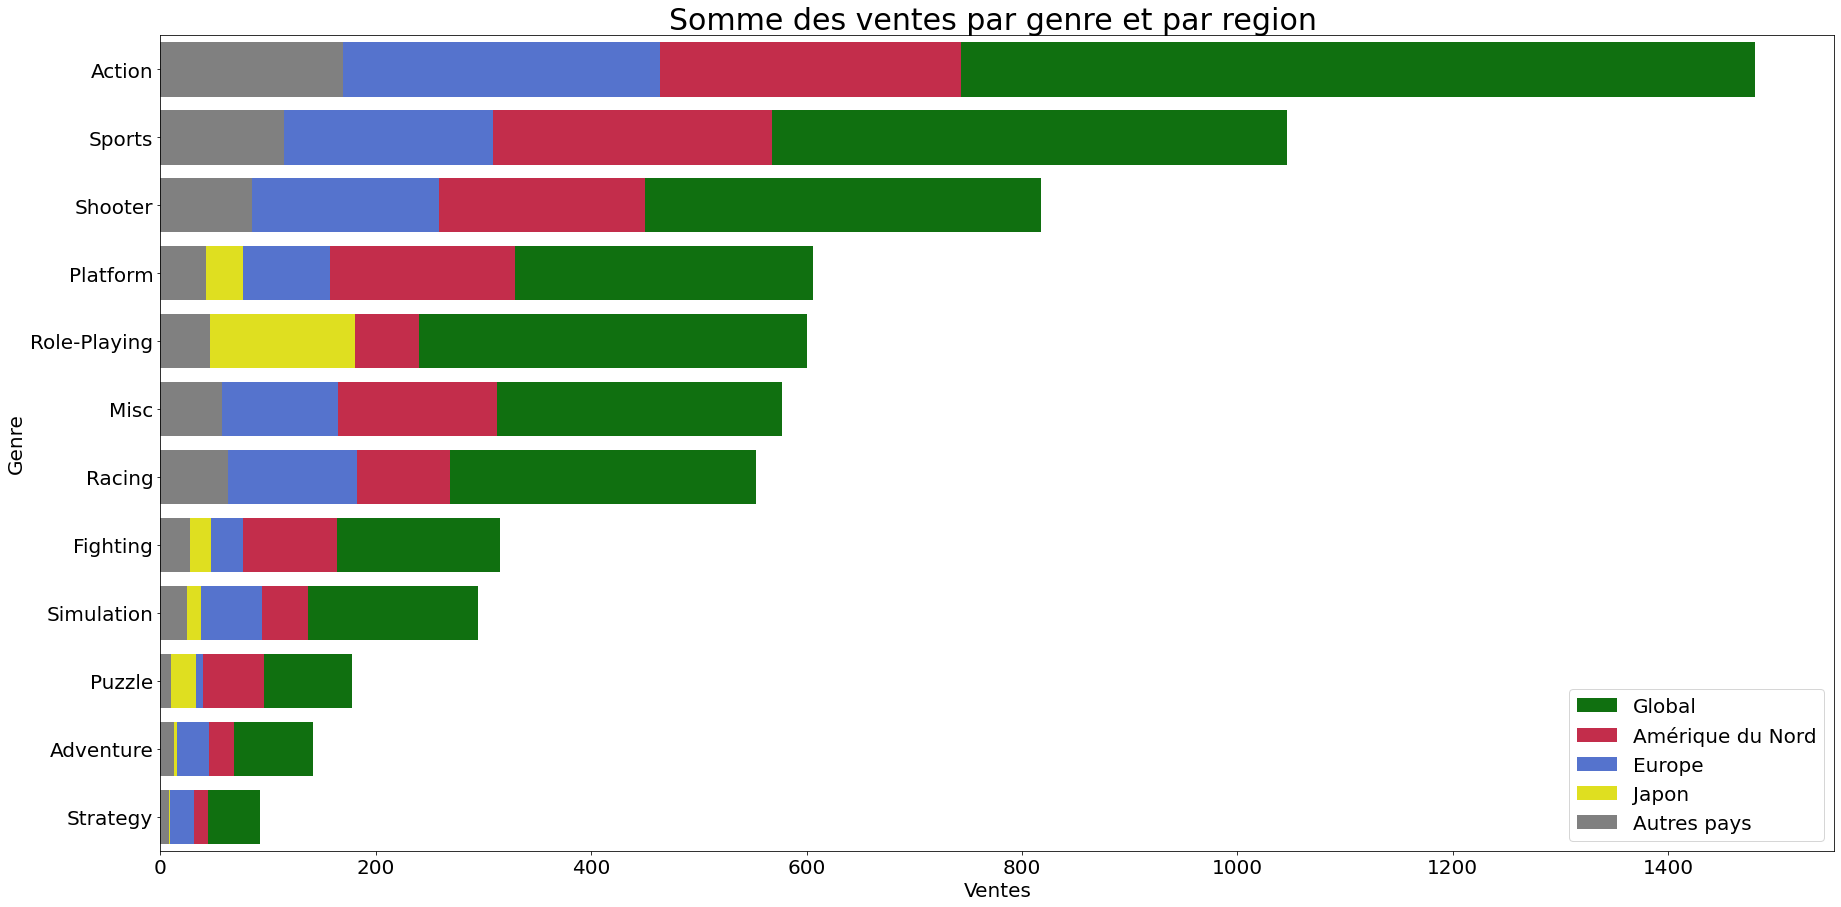

In [17]:
# Somme des ventes par genre et par région

salesByGenre = df_visu.groupby('Genre')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index()

liste_genre=salesByGenre.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,15))
columns=salesByGenre.columns.drop(['Genre'])

sns.barplot(data=salesByGenre, y='Genre', x='Global_Sales',color='green',label='Global')
sns.barplot(data=salesByGenre, y='Genre', x='NA_Sales',color='crimson',label='Amérique du Nord')
sns.barplot(data=salesByGenre, y='Genre', x='EU_Sales',color='royalblue',label='Europe')
sns.barplot(data=salesByGenre, y='Genre', x='JP_Sales',color='yellow',label='Japon')
sns.barplot(data=salesByGenre, y='Genre', x='Other_Sales',color='gray',label='Autres pays')

plt.ylabel('Genre',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Somme des ventes par genre et par region ', fontsize=30)
plt.legend(fontsize=20);



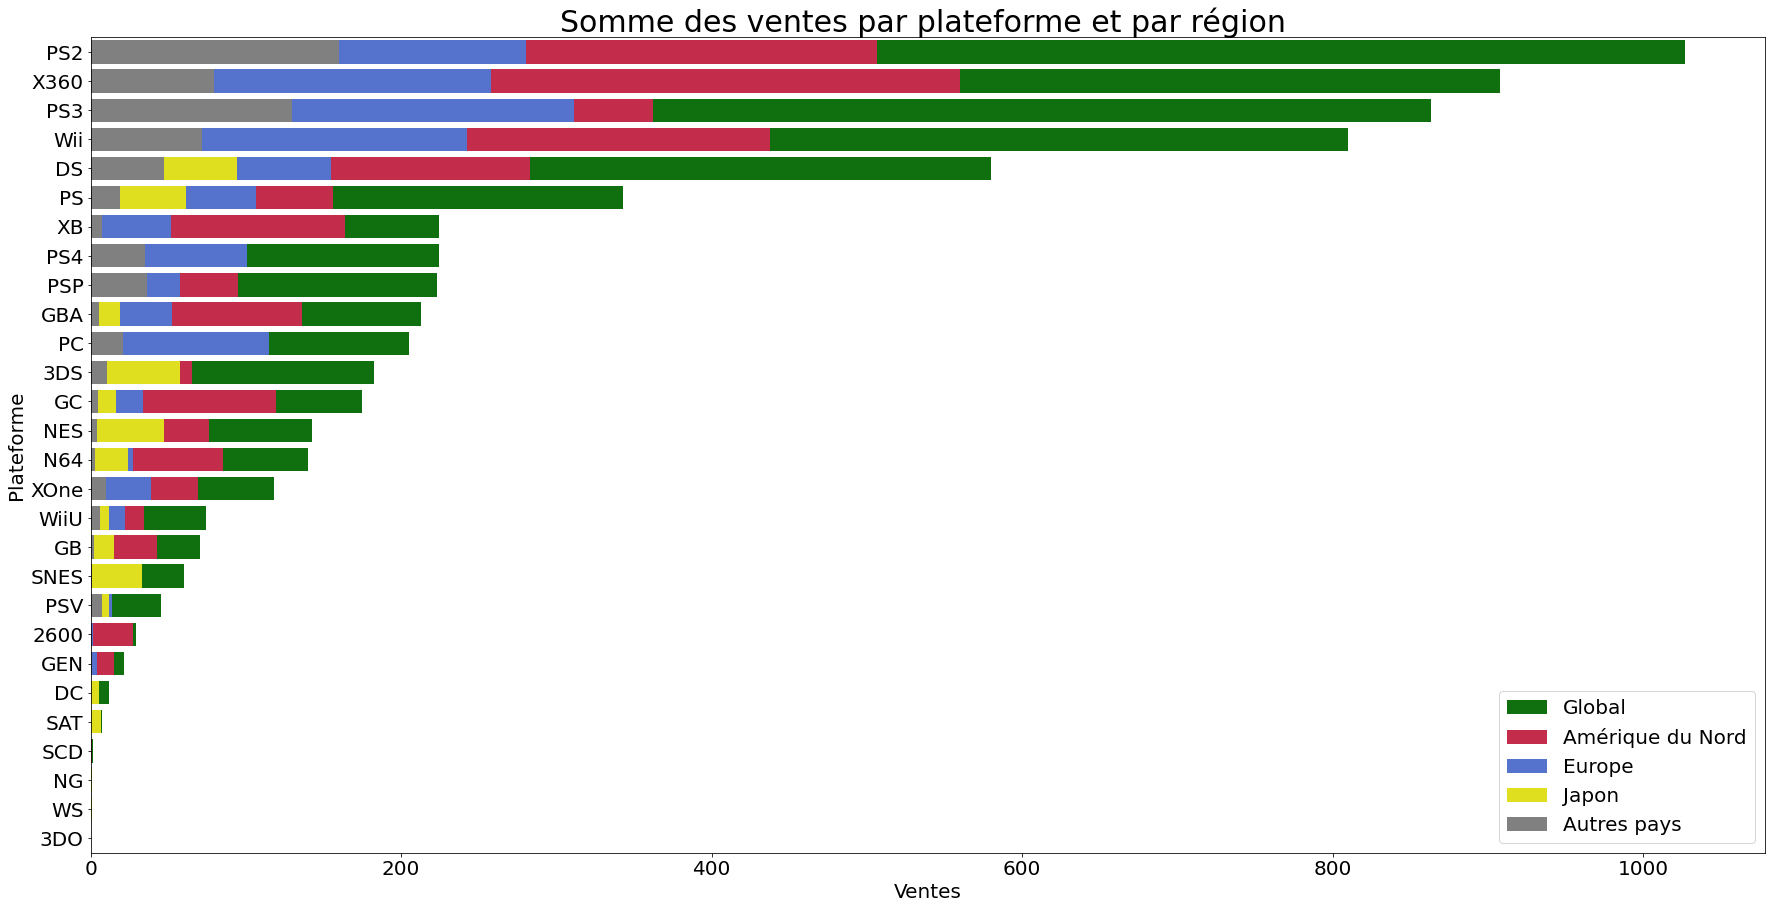

In [18]:
# Somme des ventes par plateforme et par région

salesByPlatform = df_visu.groupby('Platform')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index()

plt.figure(figsize = (30,15))

sns.barplot(data=salesByPlatform, y='Platform', x='Global_Sales',color='green',label='Global')
sns.barplot(data=salesByPlatform, y='Platform', x='NA_Sales',color='crimson',label='Amérique du Nord')
sns.barplot(data=salesByPlatform, y='Platform', x='EU_Sales',color='royalblue',label='Europe')
sns.barplot(data=salesByPlatform, y='Platform', x='JP_Sales',color='yellow',label='Japon')
sns.barplot(data=salesByPlatform, y='Platform', x='Other_Sales',color='grey',label='Autres pays')

plt.ylabel('Plateforme',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Somme des ventes par plateforme et par région ', fontsize=30)
plt.legend(fontsize=20);

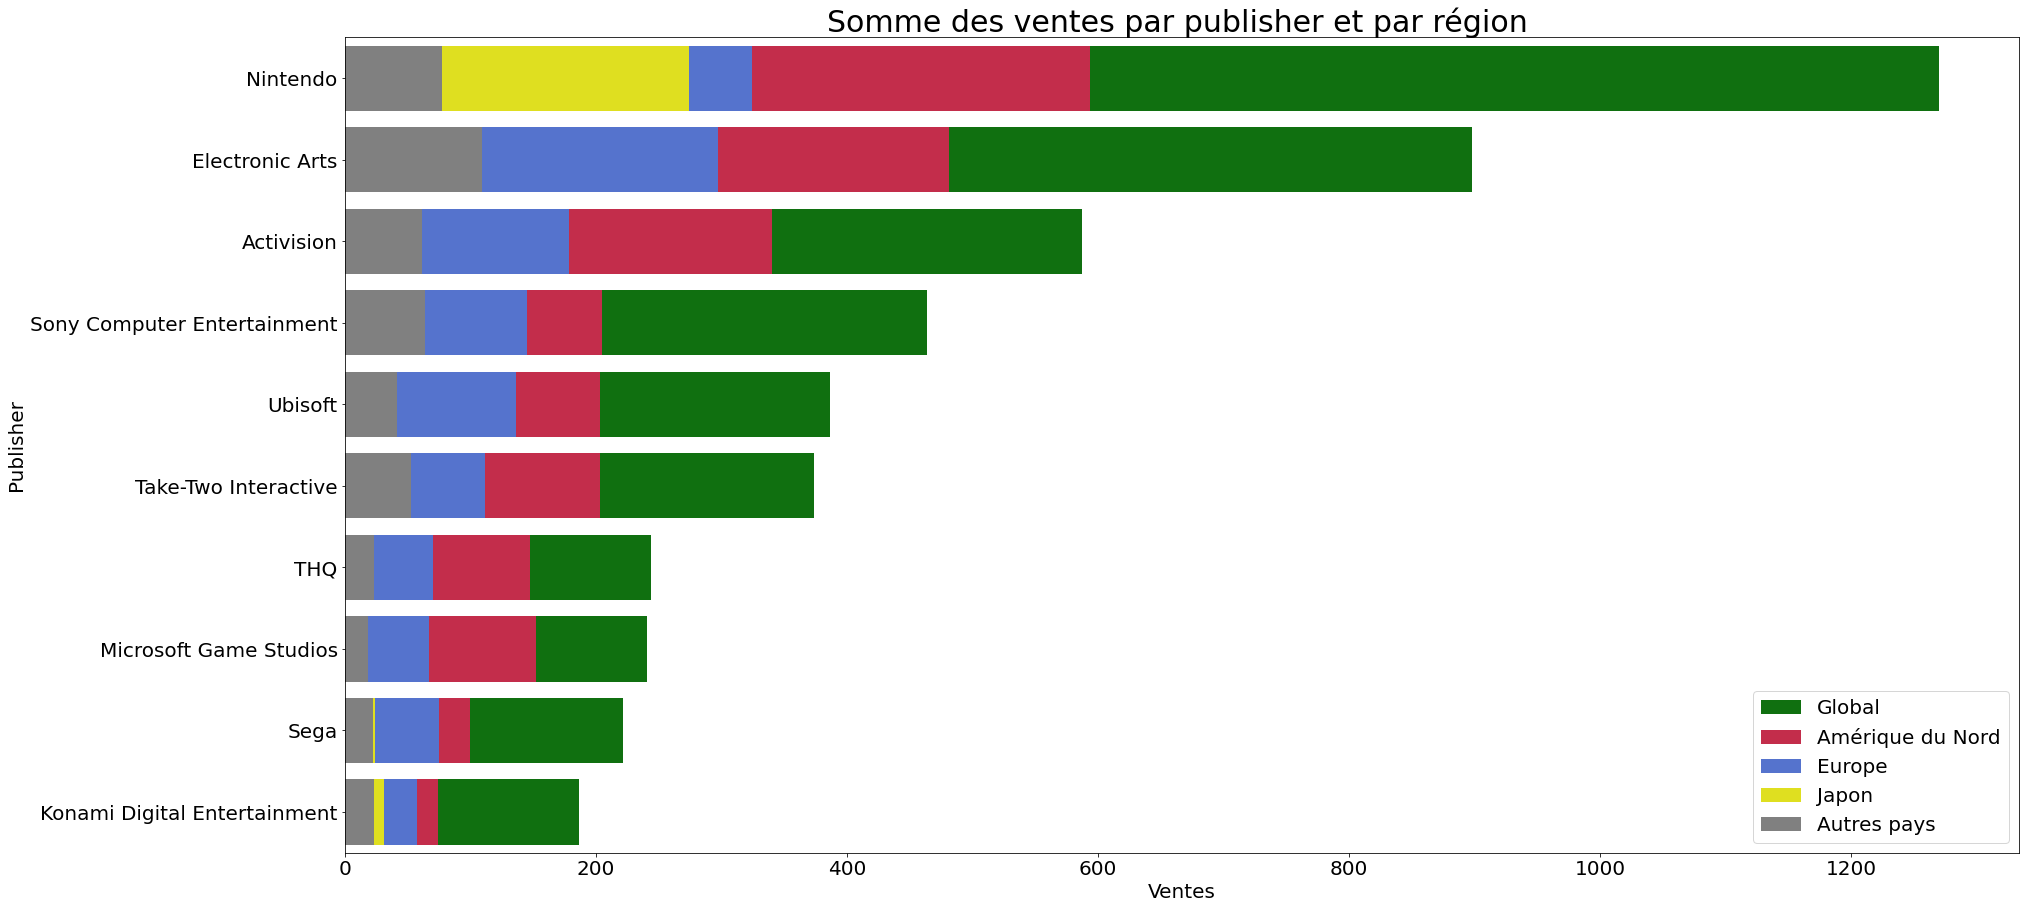

In [19]:
# Somme des ventes par publisher et par région

salesByPublisher = df_visu.groupby('Publisher')\
.agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)\
.reset_index().head(10)

plt.figure(figsize = (30,15))

sns.barplot(data=salesByPublisher, y='Publisher', x='Global_Sales',color='green',label='Global')
sns.barplot(data=salesByPublisher, y='Publisher', x='NA_Sales',color='crimson',label='Amérique du Nord')
sns.barplot(data=salesByPublisher, y='Publisher', x='EU_Sales',color='royalblue',label='Europe')
sns.barplot(data=salesByPublisher, y='Publisher', x='JP_Sales',color='yellow',label='Japon')
sns.barplot(data=salesByPublisher, y='Publisher', x='Other_Sales',color='grey',label='Autres pays')

plt.ylabel('Publisher',fontsize=20)
plt.xlabel('Ventes',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Somme des ventes par publisher et par région ', fontsize=30)
plt.legend(fontsize=20);

#salesByPublisher

# **De la spécificité du Japon**

In [10]:
%matplotlib inline

from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource
df_visu['metaNote']=df_visu['metaNote'].astype(float)

In [8]:
salesByGenre_NA = df_visu.groupby('Genre').agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales',ascending=False)
salesByGenre_EU = df_visu.groupby('Genre').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByGenre_JP = df_visu.groupby('Genre').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByGenre_OT = df_visu.groupby('Genre').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)


salesByGenre_EU = df_visu.groupby('Genre').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByGenre_JP = df_visu.groupby('Genre').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByGenre_OT = df_visu.groupby('Genre').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)

salesByPublisher_NA = df_visu.groupby('Publisher').agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales',ascending=False)
salesByPublisher_EU = df_visu.groupby('Publisher').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByPublisher_JP = df_visu.groupby('Publisher').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByPublisher_OT = df_visu.groupby('Publisher').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)

salesByDev_NA = df_visu.groupby('developper').agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales',ascending=False)
salesByDev_EU = df_visu.groupby('developper').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByDev_JP = df_visu.groupby('developper').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByDev_OT = df_visu.groupby('developper').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)

salesByName = df_visu.groupby('Name').agg({'Global_Sales':'sum','metaNote':'mean','Publisher':'last','Genre':'last'})\
.sort_values(by='Global_Sales',ascending=False)

In [9]:
salesByGenre_global = df_visu.groupby('Genre')\
.agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)

salesByGenre_global['NA_Ratio']=salesByGenre_global['NA_Sales']/salesByGenre_global['NA_Sales'].sum()*100
salesByGenre_global['EU_Ratio']=salesByGenre_global['EU_Sales']/salesByGenre_global['EU_Sales'].sum()*100
salesByGenre_global['JP_Ratio']=salesByGenre_global['JP_Sales']/salesByGenre_global['JP_Sales'].sum()*100
salesByGenre_global['OT_Ratio']=salesByGenre_global['Other_Sales']/salesByGenre_global['Other_Sales'].sum()*100


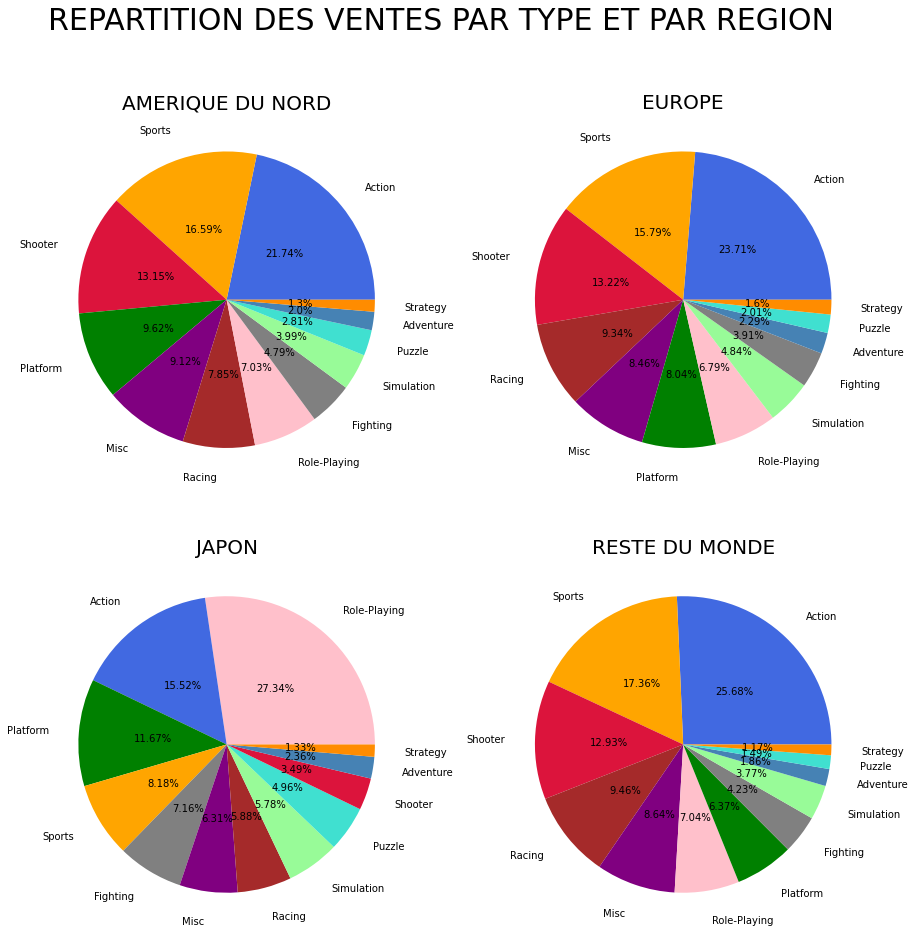

In [29]:
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.pie(x = salesByGenre_NA.NA_Sales, labels = salesByGenre_NA.index,
            colors=['royalblue','orange','crimson','green','purple','brown','pink','grey','palegreen','turquoise','steelblue','darkorange'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('AMERIQUE DU NORD',fontsize=20)
plt.subplot(222)
plt.pie(x = salesByGenre_EU.EU_Sales, labels = salesByGenre_EU.index,
            colors=['royalblue','orange','crimson','brown','purple','green','pink','palegreen','grey','steelblue','turquoise','darkorange'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('EUROPE',fontsize=20)
plt.subplot(223)
plt.pie(x = salesByGenre_JP.JP_Sales, labels = salesByGenre_JP.index,
            colors=['pink','royalblue','green','orange','grey','purple','brown','palegreen','turquoise','crimson','steelblue','darkorange'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('JAPON',fontsize=20)
plt.subplot(224)
plt.pie(x = salesByGenre_OT.Other_Sales, labels = salesByGenre_OT.index,
            colors=['royalblue','orange','crimson','brown','purple','pink','green','grey','palegreen','steelblue','turquoise','darkorange'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('RESTE DU MONDE',fontsize=20)
plt.suptitle('REPARTITION DES VENTES PAR TYPE ET PAR REGION',fontsize=30)
plt.show()

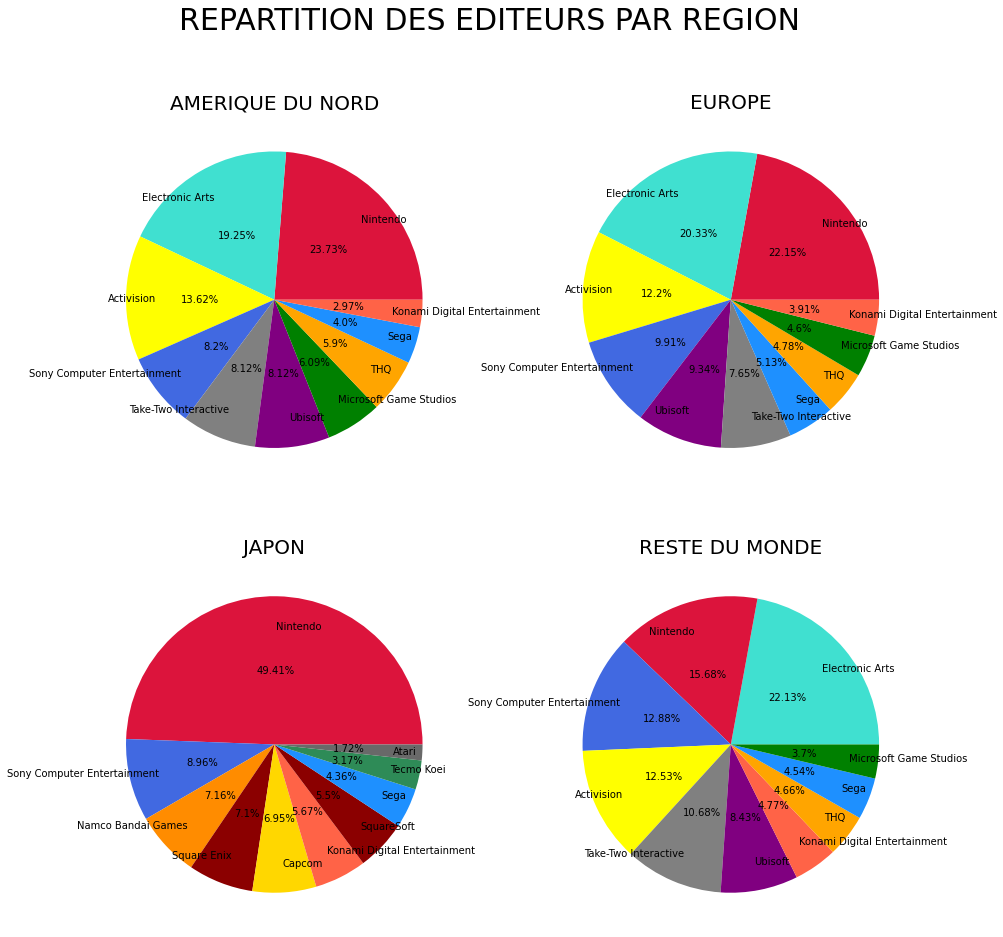

In [31]:
salesByPublisher_NA = salesByPublisher_NA.head(10)
salesByPublisher_EU = salesByPublisher_EU.head(10)
salesByPublisher_JP = salesByPublisher_JP.head(10)
salesByPublisher_OT = salesByPublisher_OT.head(10)
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.pie(x = salesByPublisher_NA.NA_Sales, labels = salesByPublisher_NA.index,
            colors=['crimson','turquoise','yellow','royalblue','grey','purple','green','orange','dodgerblue','tomato'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('AMERIQUE DU NORD',fontsize=20)
plt.subplot(222)
plt.pie(x = salesByPublisher_EU.EU_Sales, labels = salesByPublisher_EU.index,
            colors=['crimson','turquoise','yellow','royalblue','purple','grey','dodgerblue','orange','green','tomato'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('EUROPE',fontsize=20)
plt.subplot(223)
plt.pie(x = salesByPublisher_JP.JP_Sales, labels = salesByPublisher_JP.index,
            colors=['crimson','royalblue','darkorange','darkred','gold','tomato','darkred','dodgerblue','seagreen','dimgrey'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('JAPON',fontsize=20)
plt.subplot(224)
plt.pie(x = salesByPublisher_OT.Other_Sales, labels = salesByPublisher_OT.index,
            colors=['turquoise','crimson','royalblue','yellow','grey','purple','tomato','orange','dodgerblue','green'],
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('RESTE DU MONDE',fontsize=20)
plt.suptitle('REPARTITION DES EDITEURS PAR REGION',fontsize=30)
plt.show()

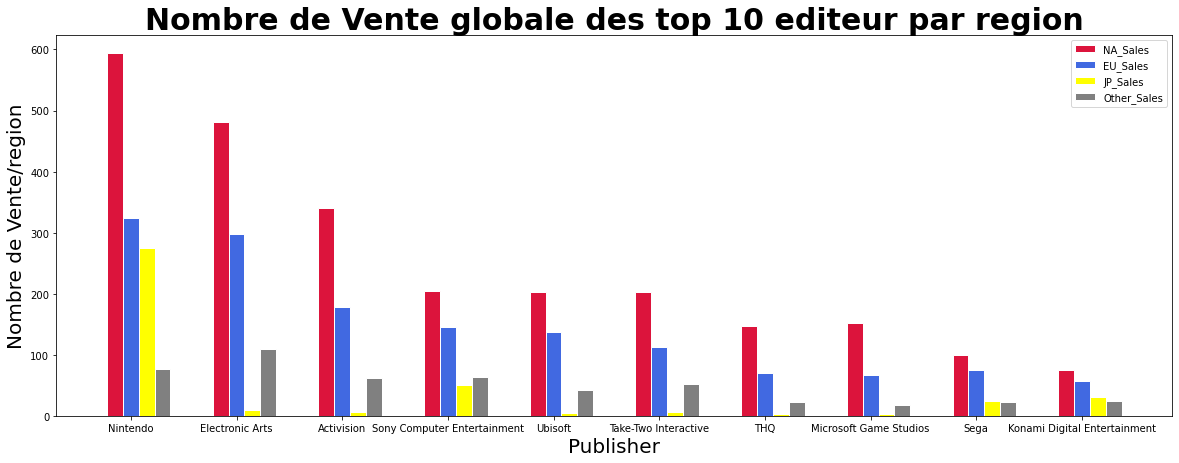

In [6]:
df_reg_publi = df_visu.groupby(df['Publisher'], as_index = False).agg({'NA_Sales':'sum','EU_Sales':'sum'
            ,'JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).sort_values('Global_Sales'
             , ascending=False).head(10)


barWidth = 0.15

r1 = np.arange(len(df_reg_publi['Publisher']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(20,7))
plt.bar(r1, df_reg_publi['NA_Sales'], color='crimson', width=barWidth, edgecolor='white', label='NA_Sales')
plt.bar(r2, df_reg_publi['EU_Sales'], color='royalblue', width=barWidth, edgecolor='white', label='EU_Sales')
plt.bar(r3, df_reg_publi['JP_Sales'], color='yellow', width=barWidth, edgecolor='white', label='JP_Sales')
plt.bar(r4, df_reg_publi['Other_Sales'], color='grey', width=barWidth, edgecolor='white', label='Other_Sales')


plt.xlabel('Publisher',fontsize=20)
plt.ylabel('Nombre de Vente/region',fontsize=20)
plt.title("Nombre de Vente globale des top 10 éditeur par region", fontweight='bold', fontsize=30);
plt.xticks([r + barWidth for r in range(len(df_reg_publi['Publisher']))], df_reg_publi['Publisher']);
plt.legend();

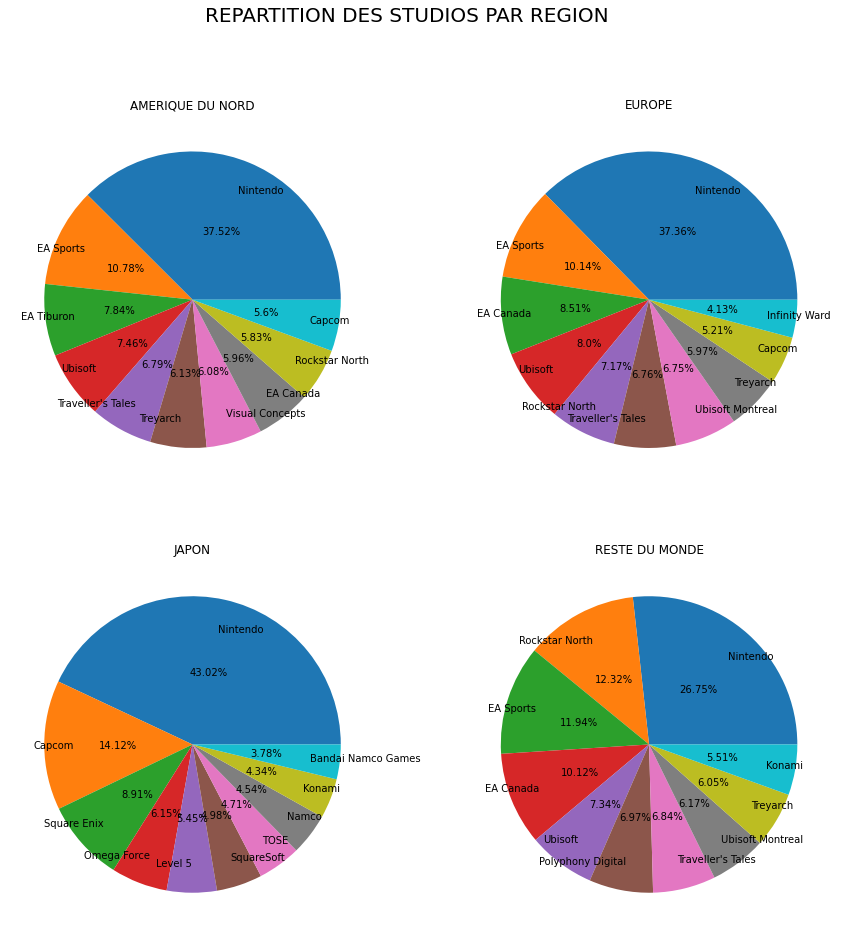

In [11]:
salesByDev_NA = salesByDev_NA.head(10)
salesByDev_EU = salesByDev_EU.head(10)
salesByDev_JP = salesByDev_JP.head(10)
salesByDev_OT = salesByDev_OT.head(10)
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.pie(x = salesByDev_NA.NA_Sales, labels = salesByDev_NA.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('AMERIQUE DU NORD')
plt.subplot(222)
plt.pie(x = salesByDev_EU.EU_Sales, labels = salesByDev_EU.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('EUROPE')
plt.subplot(223)
plt.pie(x = salesByDev_JP.JP_Sales, labels = salesByDev_JP.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('JAPON')
plt.subplot(224)
plt.pie(x = salesByDev_OT.Other_Sales, labels = salesByDev_OT.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('RESTE DU MONDE')
plt.suptitle('REPARTITION DES STUDIOS PAR REGION',fontsize=20)
plt.show()


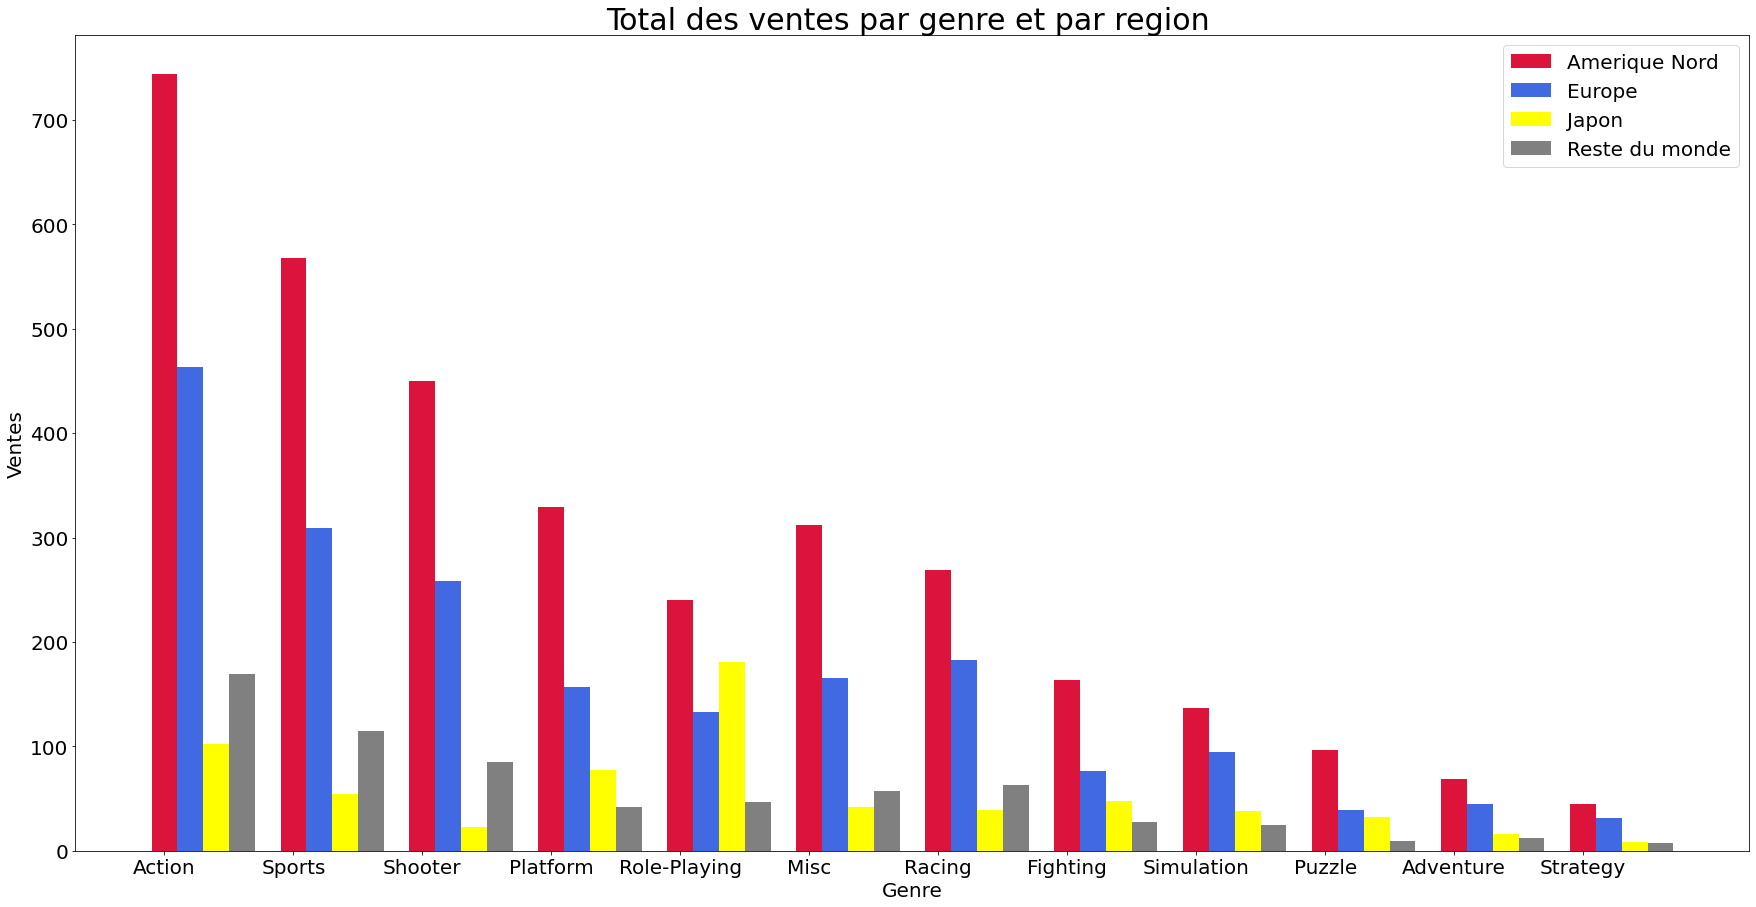

In [14]:
liste_genre=salesByGenre_global.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,15))
barWidth = 0.2
x1=range(nb_genre)
x2=[barWidth + num for num in x1]
x3=[barWidth + num for num in x2]
x4=[barWidth + num for num in x3]


plt.bar(x1,salesByGenre_global.NA_Sales, label="Amerique Nord",width=barWidth, color='crimson')
plt.bar(x2,salesByGenre_global.EU_Sales, label="Europe",width=barWidth, color='royalblue')
plt.bar(x3,salesByGenre_global.JP_Sales, label="Japon",width=barWidth,color = 'yellow')
plt.bar(x4,salesByGenre_global.Other_Sales, label="Reste du monde",width=barWidth, color='grey')

plt.xlabel('Genre',fontsize=20)
plt.ylabel('Ventes',fontsize=20)
plt.xticks(range(12), liste_genre,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Total des ventes par genre et par region ', fontsize=30)
plt.legend(fontsize=20);



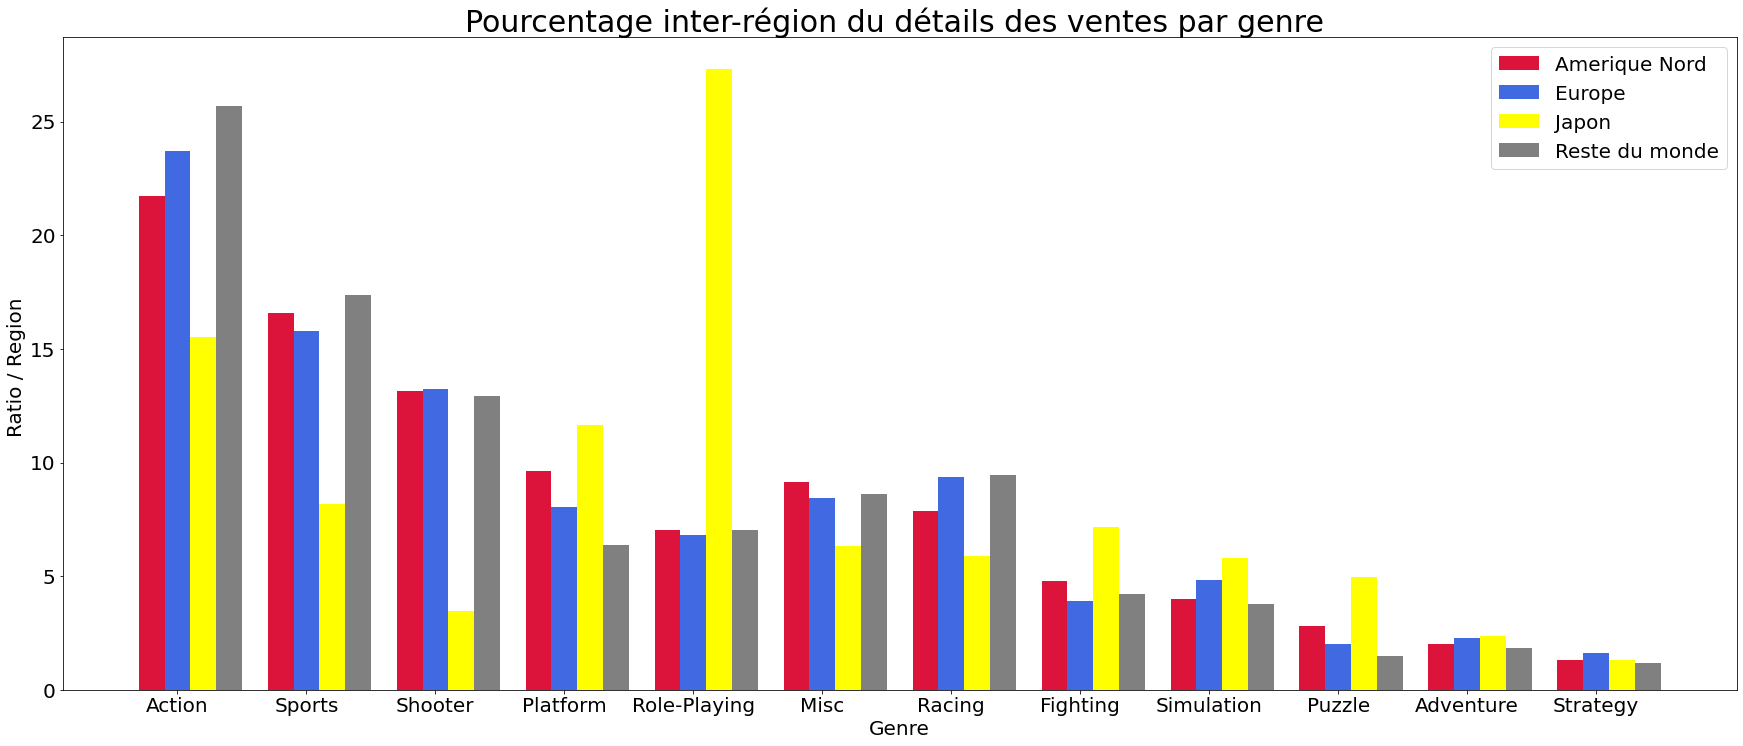

In [15]:
liste_genre=salesByGenre_global.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,12))
barWidth = 0.2
x1=range(nb_genre)
x1=[-barWidth + num for num in x1]
x2=[barWidth + num for num in x1]
x3=[barWidth + num for num in x2]
x4=[barWidth + num for num in x3]


plt.bar(x1,salesByGenre_global.NA_Ratio, label="Amerique Nord",width=barWidth, color='crimson')
plt.bar(x2,salesByGenre_global.EU_Ratio, label="Europe",width=barWidth, color='royalblue')
plt.bar(x3,salesByGenre_global.JP_Ratio, label="Japon",width=barWidth,color = 'yellow')
plt.bar(x4,salesByGenre_global.OT_Ratio, label="Reste du monde",width=barWidth, color='grey')

plt.xlabel('Genre',fontsize=20)
plt.ylabel('Ratio / Region ',fontsize=20)
plt.xticks(range(12), liste_genre,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Pourcentage inter-région du détail des ventes par genre ', fontsize=30)
plt.legend(fontsize=20);


In [12]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()
p = figure(plot_width=800,plot_height=700,title='Correlation entre notes et ventes',x_axis_label="Note attribuée sur 100",y_axis_label="Ventes ")
source = ColumnDataSource(salesByName)
x = salesByName['metaNote']
y = salesByName['Global_Sales']

r=p.circle('metaNote','Global_Sales',size=5, color='blue',hover_color = 'red',     # couleur du point survolé par le curseur de la souris.
             hover_alpha = 0.5,source=source)

h = HoverTool(renderers = [r],               
        tooltips = [("Jeu,Genre,Editeur,note,ventes", "@Name  /    @Genre  /   @Publisher  /  @metaNote  /  @Global_Sales")])
                                                 
# Ajout du HoverTool aux outils de la figure

p.add_tools(h)
show(p)

Loading BokehJS ...

## Analyse des notes et nombre des ventes 

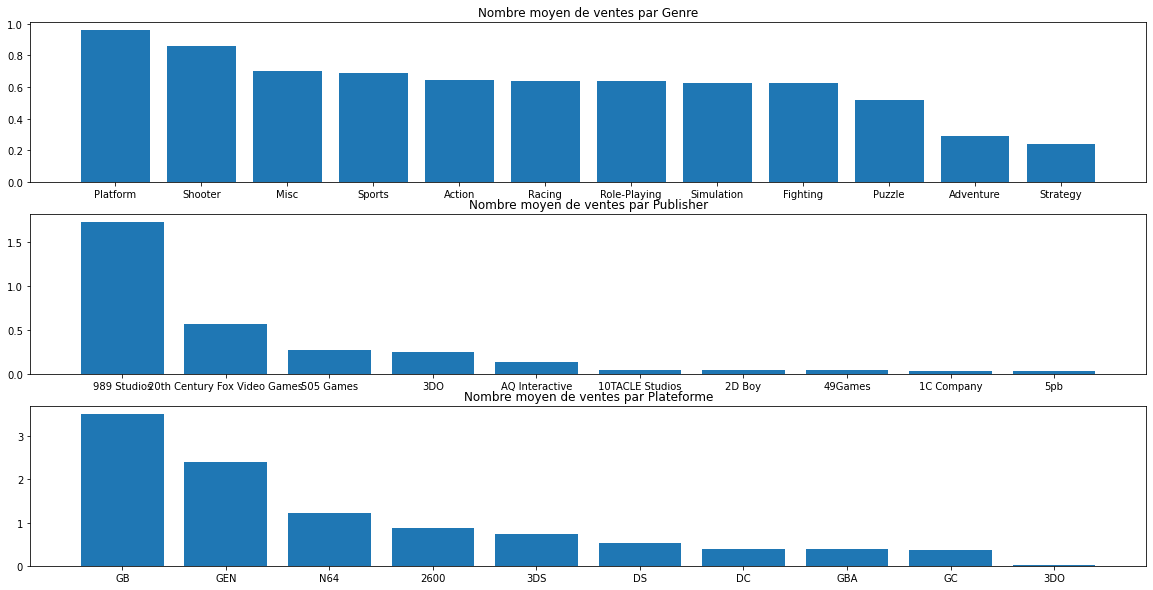

In [15]:
# Visualisation

# Ventes par genre 
salesByGenre = df_visu.groupby('Genre').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
#plt.hist()
plt.bar(salesByGenre['Global_Sales'].index,salesByGenre['Global_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes par Genre');

# Ventes par éditeur
plt.subplot(3,1,2)
salesByPublisher = df_visu.groupby('Publisher').agg({'Global_Sales':'mean'}).head(10).sort_values(by='Global_Sales',ascending=False)
#salesByPublisher
plt.bar(salesByPublisher['Global_Sales'].index,salesByPublisher['Global_Sales']);
plt.title('Nombre moyen de ventes par Publisher');

# Ventes par plateforme
plt.subplot(3,1,3)
salesByPlatform = df_visu.groupby('Platform').agg({'Global_Sales':'mean'}).head(10).sort_values(by='Global_Sales',ascending=False)
#salesByPublisher
plt.bar(salesByPlatform['Global_Sales'].index,salesByPlatform['Global_Sales']);
plt.title('Nombre moyen de ventes par Plateforme');

# Ventes

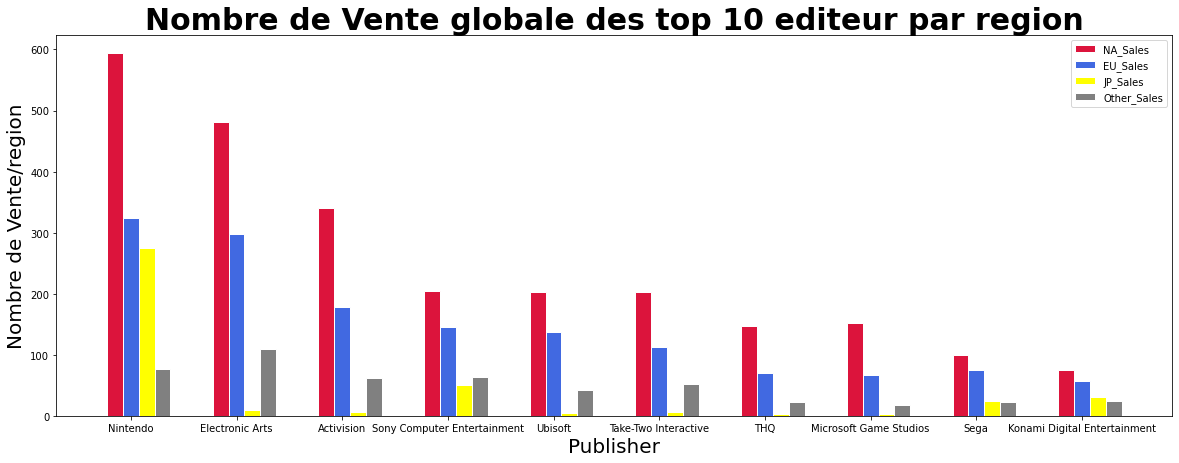

In [7]:
df_reg_publi = df_visu.groupby(df['Publisher'], as_index = False).agg({'NA_Sales':'sum','EU_Sales':'sum'
            ,'JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).sort_values('Global_Sales'
             , ascending=False).head(10)


barWidth = 0.15

r1 = np.arange(len(df_reg_publi['Publisher']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(20,7))
plt.bar(r1, df_reg_publi['NA_Sales'], color='crimson', width=barWidth, edgecolor='white', label='NA_Sales')
plt.bar(r2, df_reg_publi['EU_Sales'], color='royalblue', width=barWidth, edgecolor='white', label='EU_Sales')
plt.bar(r3, df_reg_publi['JP_Sales'], color='yellow', width=barWidth, edgecolor='white', label='JP_Sales')
plt.bar(r4, df_reg_publi['Other_Sales'], color='grey', width=barWidth, edgecolor='white', label='Other_Sales')


plt.xlabel('Publisher',fontsize=20)
plt.ylabel('Nombre de Vente/region',fontsize=20)
plt.title("Nombre de Vente globale des top 10 editeur par region", fontweight='bold', fontsize=30);
plt.xticks([r + barWidth for r in range(len(df_reg_publi['Publisher']))], df_reg_publi['Publisher']);
plt.legend();

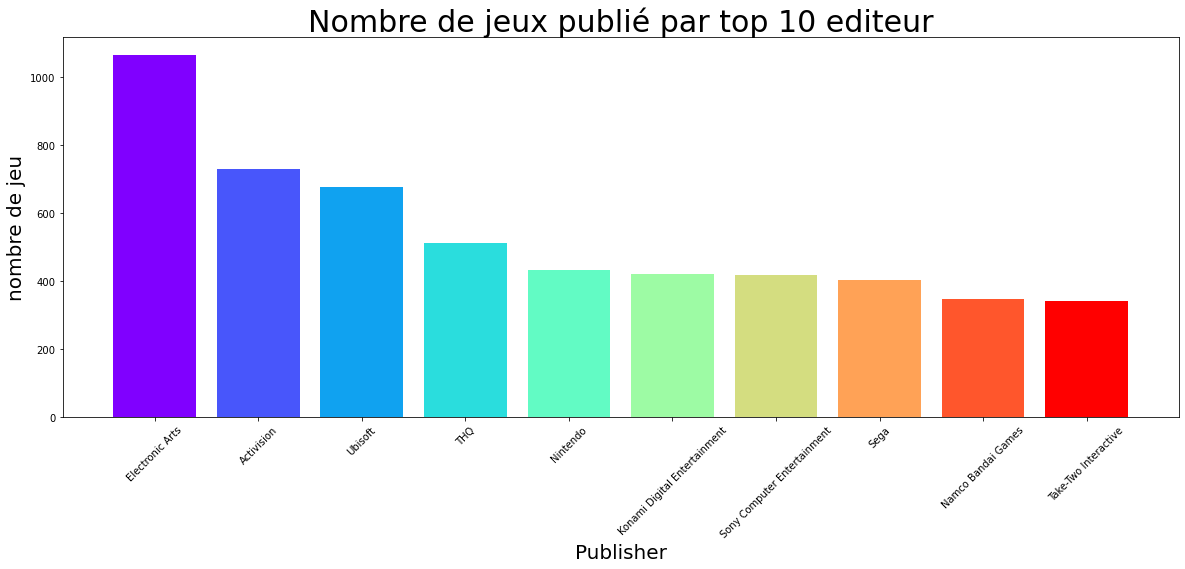

In [14]:
df_count_game=df_visu.groupby(df['Publisher'], as_index = False).agg({'Name':'count'}).sort_values('Name', ascending=False).head(10)

plt.figure(figsize=(20,7))

plt.bar(df_count_game['Publisher'], df_count_game['Name'],color = cm.rainbow(np.linspace(0, 1, len(df_count_game))))

plt.xlabel('Publisher',fontsize=20)
plt.ylabel('nombre de jeu',fontsize=20)
plt.xticks(rotation = '45')
plt.title("Nombre de jeux publié par top 10 editeur",fontsize=30);

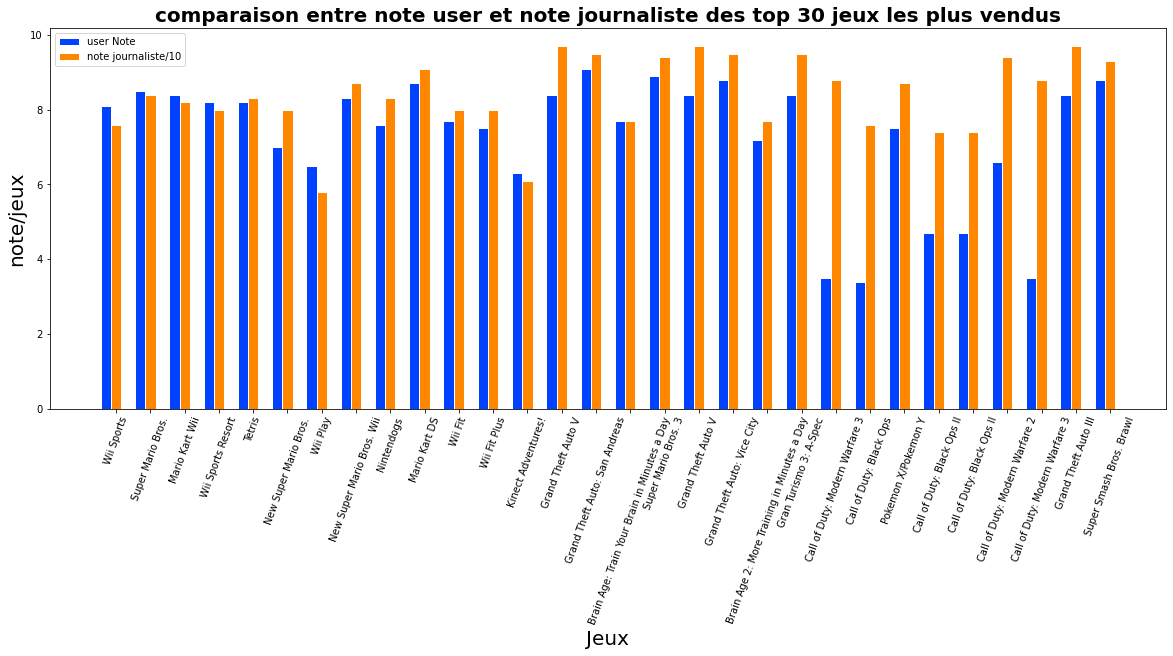

In [5]:
df_vote=df_visu[['Name','userNote','metaNote','metaNoteQ','Global_Sales' ]].sort_values('Global_Sales', ascending=False).head(30)
z=[]
for i in df_vote['metaNote']:
    z.append(i/10)
df_vote['metaNote']=z


barWidth = 0.30
 
r1 = np.arange(len(df_vote['Name']))
r2 = [x + barWidth for x in r1]

 
plt.figure(figsize=(20,7))
plt.bar(r1, df_vote['userNote'], color='#0042ff', width=barWidth, edgecolor='white', label='user Note')
plt.bar(r2, df_vote['metaNote'], color='#ff8700', width=barWidth, edgecolor='white', label='note journaliste/10')


plt.xlabel('Jeux',fontsize=20)
plt.ylabel('note/jeux',fontsize=20)
plt.title("comparaison entre note user et note journaliste des top 30 jeux les plus vendus", fontweight='bold',fontsize=20);
plt.xticks([r + barWidth for r in range(len(df_vote['Name']))], df_vote['Name'])
plt.xticks(rotation = '70')
plt.legend();

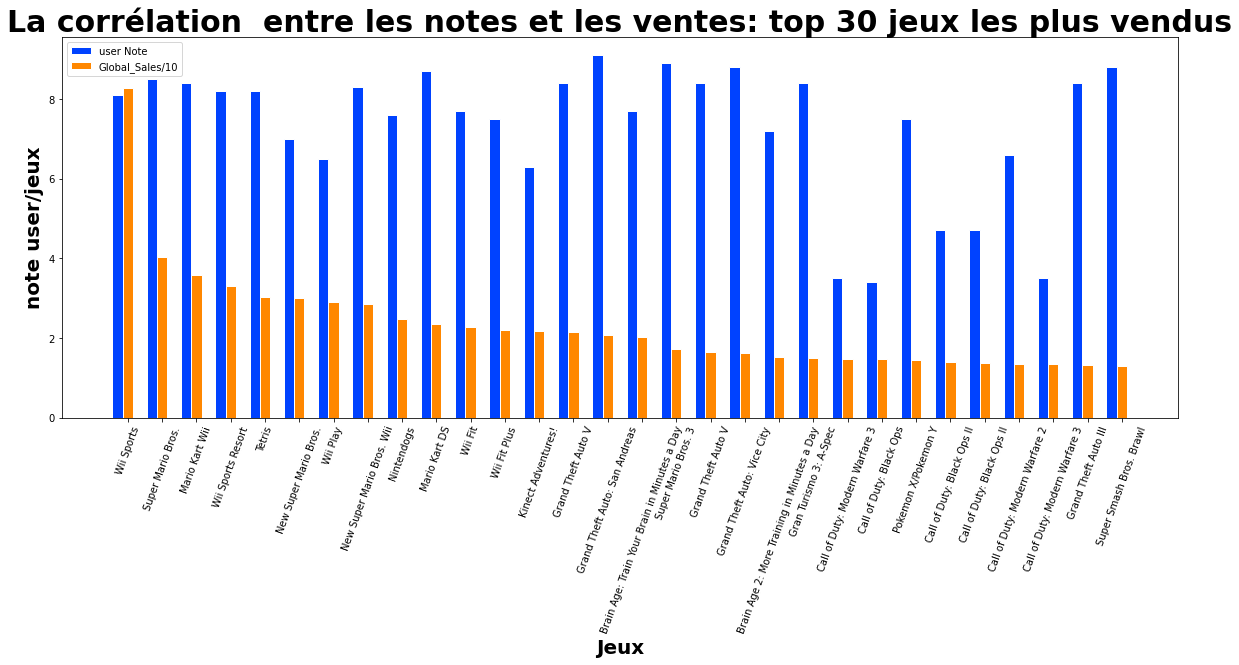

In [4]:
df_vote=df_visu[['Name','userNote','metaNote','metaNoteQ','Global_Sales' ]].sort_values('Global_Sales', ascending=False).head(30)
z=[]
for i in df_vote['Global_Sales']:
    z.append(i/10)
df_vote['Global_Sales']=z

barWidth = 0.30
 
r1 = np.arange(len(df_vote['Name']))
r2 = [x + barWidth for x in r1]

 
plt.figure(figsize=(20,7))
plt.bar(r1, df_vote['userNote'], color='#0042ff', width=barWidth, edgecolor='white', label='user Note')
plt.bar(r2, df_vote['Global_Sales'], color='#ff8700', width=barWidth, edgecolor='white', label='Global_Sales/10')


plt.xlabel('Jeux', fontweight='bold',fontsize=20)
plt.ylabel('note user/jeux', fontweight='bold',fontsize=20)
plt.title("La corrélation  entre les notes et les ventes: top 30 jeux les plus vendus", fontweight='bold',fontsize=30);
plt.xticks([r + barWidth for r in range(len(df_vote['Name']))], df_vote['Name'])
plt.xticks(rotation = '70')
plt.legend();